In [108]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy import stats
import numpy as np
import xarray as xr
from astropy.time import Time
import metpy.calc as mp
from metpy.units import units
import matplotlib.dates as mdates

def readTracks(file):
    dfTracks = pd.read_csv(file)
    dfTracks['Date_S'] = dfTracks['Date_S'].astype(str)
    dfTracks['Datetime'] = pd.to_datetime(dfTracks['Date_S'] + ' ' + dfTracks['Time_S'])
    dfTracks = dfTracks.drop(['Date_S','Time_S'], axis=1)
    dfTracks = dfTracks.set_index('Datetime')
    return dfTracks

# Set to 3 for the new version with .6 and pmodified ping count
df1 = readTracks('../data/analysisFiles/TrackRegions1_linear3.csv')
df4 = readTracks('../data/analysisFiles/TrackRegions4_linear3.csv')
dfD1T = pd.concat([df1,df4])
dfD1T['SigBS_mean'] = 10**(dfD1T.TS_mean/10)
df2 = readTracks('../data/analysisFiles/TrackRegions2_linear3.csv')
df5 = readTracks('../data/analysisFiles/TrackRegions5_linear3.csv')
dfD2T = pd.concat([df2,df5])
dfD3T = readTracks('../data/analysisFiles/TrackRegions6_linear3.csv')

def setTrack(df,mooring):
    a = df[['TS_mean','linearSpeed','linearHead','Target_depth_mean']]
    cts,binL = np.histogram(a.linearHead,bins=36,range=[0,360])
    binL = binL[:-1]
    a['rotateHead'] = a.linearHead-(binL[cts == cts.max()].mean()+10)
    a['mooring'] = mooring
    return a

def fmtAxis(ax):
    maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,2))
    ax.xaxis.set_major_locator(maj_loc)
    min_loc = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(min_loc)
    zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
    maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
    ax.xaxis.set_major_formatter(maj_fmt)
    
a = setTrack(dfD1T,1)
b = setTrack(dfD2T,2)
c = setTrack(dfD3T,3)

<ipython-input-108-a4f0bc10aded>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['rotateHead'] = a.linearHead-(binL[cts == cts.max()].mean()+10)
<ipython-input-108-a4f0bc10aded>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['mooring'] = mooring


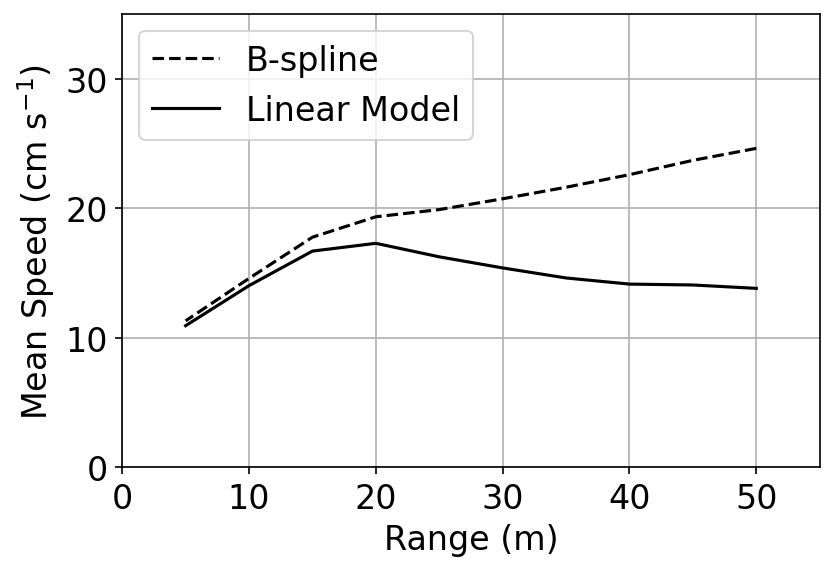

In [164]:
import matplotlib.pyplot as plt
allT = pd.concat([dfD1T,dfD2T,dfD3T])
#allT = dfD1T
r = 5

spDir,spLin,spSmooth,spLinSD,spSmoothSD = [],[],[],[],[]
for d in np.arange(0,50,r):
    spDir.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].directSpeed.mean()*100)
    spLin.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].linearSpeed.mean()*100)
    spLinSD.append(np.std(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].linearSpeed*100))
    spSmoothSD.append(np.std(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].linearSpeed*100))
    spSmooth.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].smoothedSpeed.mean()*100)
    
error = .2
fig = plt.figure(dpi=150)
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0,50,r),spSmooth,'--k')
plt.plot(np.arange(0,50,r),spLin,'-k')
#plt.fill_between(np.arange(0,50,r),np.array(spLin)-np.array(spLinSD),np.array(spLin)+np.array(spLinSD),color='dimgrey',alpha=0.4)
#plt.fill_between(np.arange(0,50,r),np.array(spSmooth)-np.array(spSmoothSD),np.array(spSmooth)+np.array(spSmoothSD),color='grey',alpha=0.4,hatch='///')
plt.axis([-5,50,0,35])
plt.gca().invert_xaxis()
plt.xticks(np.arange(0,51,10))
plt.gca().set_xticklabels([str(a) for a in np.arange(50,-1,-10)])
plt.xlabel('Range (m)')
plt.ylabel('Mean Speed (cm s$^{-1}$)')
plt.legend(['B-spline','Linear Model'],loc='upper left')
plt.grid()

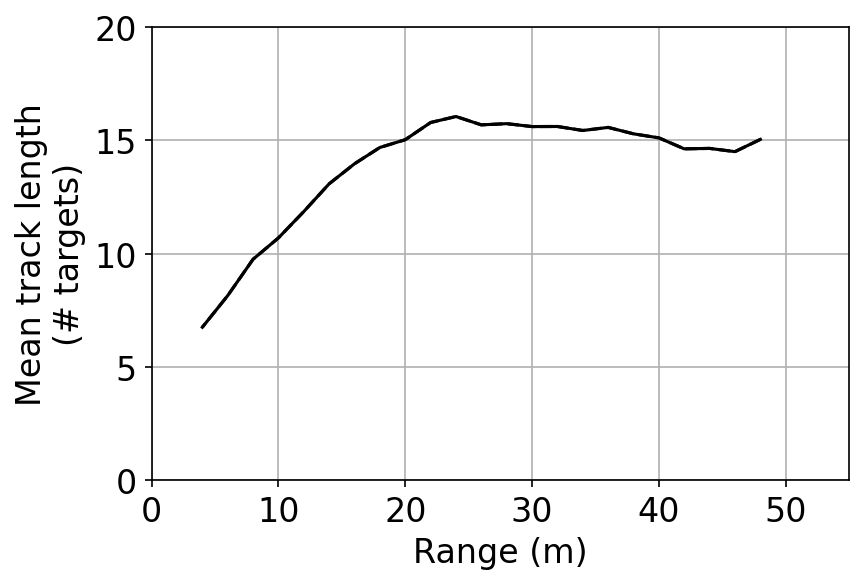

In [154]:
import matplotlib.pyplot as plt
allT = pd.concat([dfD1T,dfD2T,dfD3T])
#allT = dfD1T
r = 2

spDir,spLin,spSmooth,spLinSD,spSmoothSD = [],[],[],[],[]
for d in np.arange(0,50,r):
    spDir.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].Num_targets.mean())
    spLin.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].Num_targets.mean())
    spLinSD.append(np.std(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].Num_targets))
    spSmoothSD.append(np.std(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].Num_targets))
    spSmooth.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].Num_targets.mean())
    
error = .2
fig = plt.figure(dpi=150)
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0,50,r),spSmooth,'--k')
plt.plot(np.arange(0,50,r),spLin,'-k')
#plt.fill_between(np.arange(0,50,r),np.array(spLin)-np.array(spLinSD),np.array(spLin)+np.array(spLinSD),color='grey',alpha=0.4)
#plt.fill_between(np.arange(0,50,r),np.array(spSmooth)-np.array(spSmoothSD),np.array(spSmooth)+np.array(spSmoothSD),color='blue',alpha=0.4)
plt.axis([-5,50,0,20])
plt.gca().invert_xaxis()
plt.xticks(np.arange(0,51,10))
plt.gca().set_xticklabels([str(a) for a in np.arange(50,-1,-10)])
plt.xlabel('Range (m)')
plt.ylabel('Mean track length\n(# targets)')
#plt.legend(['B-spline','Linear Model'],loc='upper left')
plt.grid()

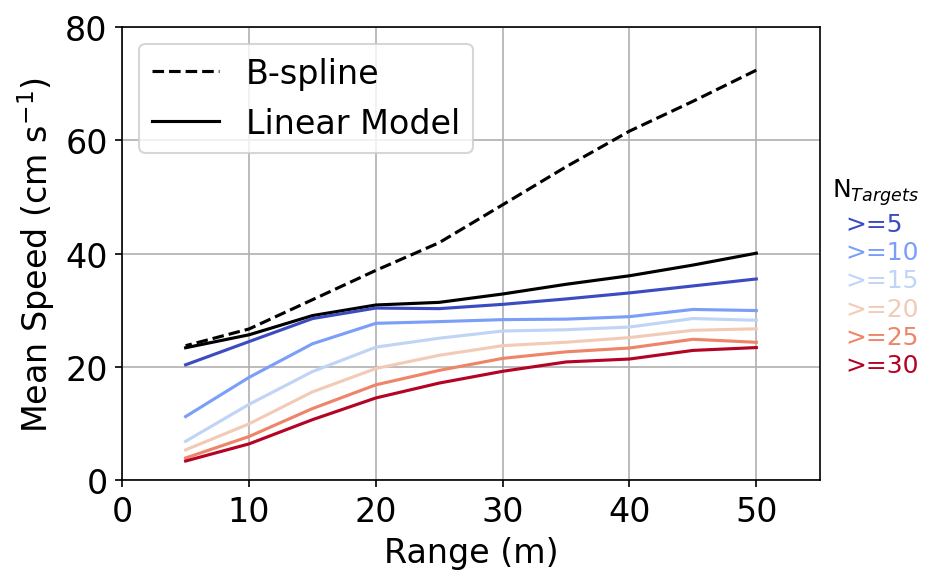

In [133]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

N = len(np.arange(5,31,5))
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


allT = pd.concat([dfD1T,dfD2T,dfD3T])
r = 5
fig = plt.figure(dpi=150)
plt.plot(np.arange(0,50,r),[100*s for s in spSmooth],'--',color='k')
plt.plot(np.arange(0,50,r),[100*s for s in spLin],'-',color='k')
ct = 0
for tL in np.arange(5,31,5):
    curT = allT[allT.Num_targets>= tL]
    spLin=[]
    for d in np.arange(0,50,r):
        spLin.append(np.mean(curT[(curT.Target_depth_mean >= d)&(curT.Target_depth_mean < d+r)].linearSpeed*100))
    
    plt.plot(np.arange(0,50,r),spLin,color=cmap(np.linspace(0, 1, N))[ct])
    plt.text(-7,44-(ct*5), '>='+str(np.arange(5,31,5)[ct]), color=cmap(np.linspace(0, 1, N))[ct],fontsize=12)
    
    ct+=1
plt.axis([-5,50,0,80])
plt.gca().invert_xaxis()
plt.xticks(np.arange(0,51,10))
plt.gca().set_xticklabels([str(a) for a in np.arange(50,-1,-10)])
plt.xlabel('Range (m)')
plt.ylabel('Mean Speed (cm s$^{-1}$)')
plt.legend(['B-spline','Linear Model'])
plt.text(-6,50,'N$_{Targets}$',fontsize=12)

plt.grid()

In [169]:
bw = [2*(x*np.tan(np.radians(9))) for x in np.arange(5,51,5)]
for nT in [5]:
    sp = [d/nT/2 for d in bw]
sp

[0.15838444032453627,
 0.31676888064907255,
 0.47515332097360885,
 0.6335377612981451,
 0.7919222016226815,
 0.9503066419472177,
 1.108691082271754,
 1.2670755225962902,
 1.4254599629208264,
 1.583844403245363]

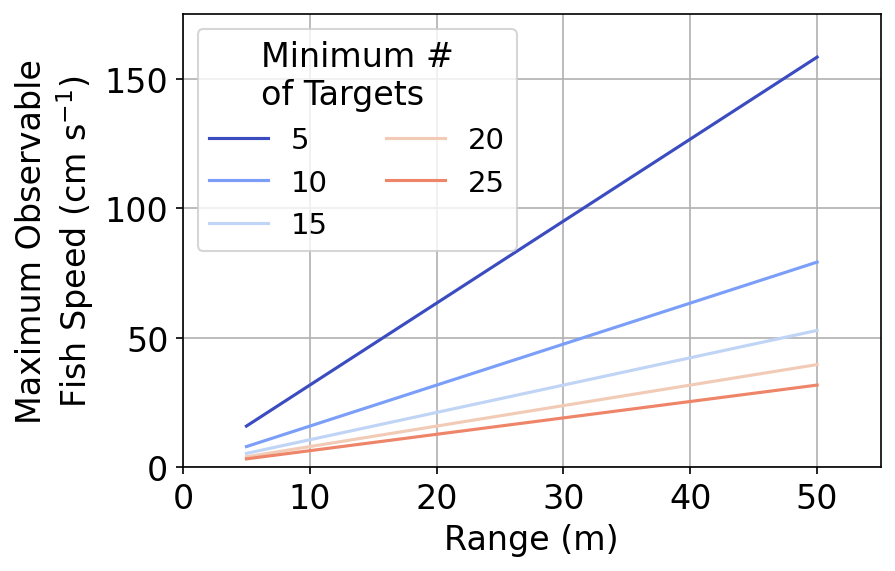

In [192]:
# how big is the beam?
fig = plt.figure(dpi=150)
N = len(np.arange(5,31,5))
cmap = plt.cm.coolwarm
ct=0
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))
bw = [2*(x*np.tan(np.radians(9))) for x in np.arange(5,51,5)]
for nT in [5,10,15,20,25]:
    sp = [d/nT/2 for d in bw]
    plt.plot(np.arange(5,51,r),[100*s for s in sp],color=cmap(np.linspace(0, 1, N))[ct])
    #plt.text(55,44-(ct*10), '>='+str(np.arange(5,31,5)[ct]), color=cmap(np.linspace(0, 1, N))[ct],fontsize=12)
    ct+=1
plt.axis([0,55,0,175])
plt.xlabel('Range (m)')
plt.ylabel('Maximum Observable\nFish Speed (cm s$^{-1}$)')
plt.grid()
plt.legend(['5','10','15','20' ,'25'],title='Minimum #\nof Targets',fontsize=14,ncol=2)
#plt.text(-6,50,'N$_{Targets}$',fontsize=12)

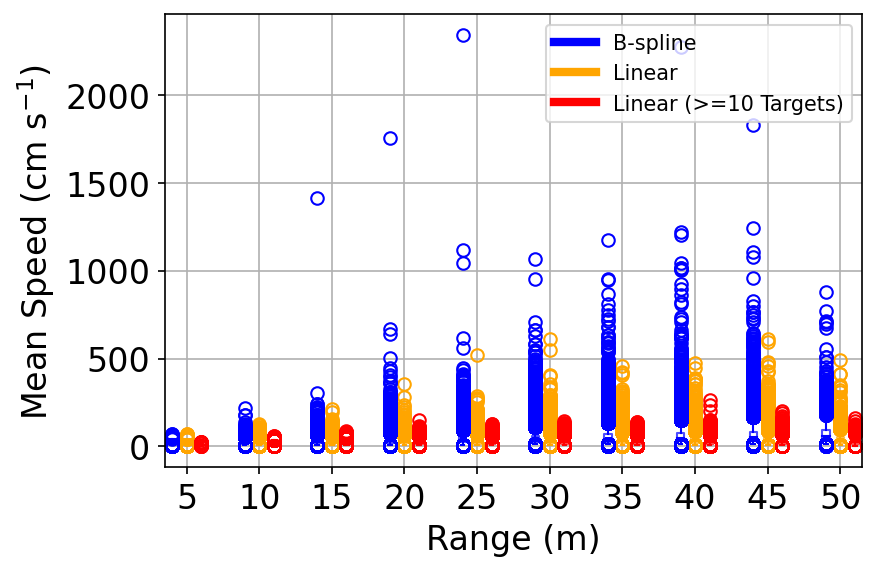

In [108]:
import matplotlib.pyplot as plt
allT = pd.concat([dfD1T,dfD2T,dfD3T])
r = 5

spLinLong,spLin,spSmooth = [],[],[]
for d in np.arange(0,50,r):
    spLinLong.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)&(allT.Num_targets >=10)].linearSpeed*100)
    spLin.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].linearSpeed*100)
    spSmooth.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].smoothedSpeed*100)
    
fig = plt.figure(dpi=150)
plt.rcParams.update({'font.size': 16})

box=plt.boxplot(spLin,positions =np.arange(5,51,r),whis=[5,95],showfliers=True)
col='orange'
for item in ['whiskers','caps']:
    plt.setp(box[item], color=col)
for item in ['medians','boxes']:
    plt.setp(box[item], color=col)
plt.setp(box["fliers"], markeredgecolor=col)
plt.setp(box["boxes"], color=col,alpha=0.7)

box=plt.boxplot(spSmooth,positions =np.arange(5,51,r)+1,whis=[5,95],showfliers=True)
col='blue'
for item in ['whiskers','caps']:
    plt.setp(box[item], color=col)
for item in ['medians','boxes']:
    plt.setp(box[item], color=col)
plt.setp(box["fliers"], markeredgecolor=col)
plt.setp(box["boxes"], color=col,alpha=0.7)

box=plt.boxplot(spLinLong,positions =np.arange(5,51,r)-1,whis=[5,95],showfliers=True)
col='red'
for item in ['whiskers','caps']:
    plt.setp(box[item], color=col)
for item in ['medians','boxes']:
    plt.setp(box[item], color=col)
plt.setp(box["fliers"], markeredgecolor=col)
plt.setp(box["boxes"], color=col,alpha=0.7)

#plt.axis([0,52,0,200])
plt.gca().invert_xaxis()
plt.xticks(np.arange(5,51,5))
plt.gca().set_xticklabels([str(a) for a in np.arange(50,4,-5)])
plt.xlabel('Range (m)')
plt.ylabel('Mean Speed (cm s$^{-1}$)')
#plt.legend(['B-spline','Linear Model','Linear Model (>=15 Targets)'],fontsize=10)
plt.grid()

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4)]


plt.legend(custom_lines, ['B-spline', 'Linear', 'Linear (>=10 Targets)'],fontsize=10)

In [173]:
files = ['../data/physicalData/PMEL_2017_17ckp11a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp11a_wcp_vel.nc',
    '../data/physicalData/PMEL_2017_17ckp1a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp1a_wcp_vel.nc',
    '../data/physicalData/PMEL_2018_18ckp4a_wcp_vel.nc']
m = [1,1,2,2,3]
dt = []
i = 0
for file in files:
    ds = xr.open_dataset(file,decode_times=False)
    times = ds.time.values+ds.time2.values/1000/60/60/24
    t2 = [Time(time,format='jd').iso for time in times]
    ds['time3'] = pd.to_datetime(t2)
    ds = ds.where(ds.v_1206<1000)
    #dt.append(pd.DataFrame({'dt':ds.time3,'v':np.ravel(ds.sel(depth=28).v_1206),'u':np.ravel(ds.sel(depth=28).u_1205),'mooring':m[i]}))
    dt.append(pd.DataFrame({'dt':ds.time3.values,'u':np.concatenate(np.concatenate(ds.u_1205.mean(dim='depth').values,axis=0)),'v':np.concatenate(np.concatenate(ds.v_1206.mean(dim='depth').values,axis=0)),'mooring':m[i]}))
    i +=1
df = pd.concat(dt)
df = df.set_index('dt')

dt = []
for dfT in [a,b,c]:
    vCur = df[df.mooring==dfT.mooring.unique()[0]]
    vCur = vCur.reindex(dfT.index, method='nearest')
    dfN = pd.merge(dfT,vCur,how='inner', left_index=True, right_index=True)
    dfN['currentDir'] = mp.wind_direction(dfN.u.values*units('cm/s'), dfN.v.values*units('cm/s'),convention='to')
    dfN['currentSpeed'] = mp.wind_speed(dfN.u.values*units('cm/s'), dfN.v.values*units('cm/s'))
    dt.append(dfN.drop_duplicates())
dfMerge = pd.concat(dt)
dfMerge['angOffset'] = abs(dfMerge.currentDir-dfMerge.linearHead)
dfMerge['withCur'] = 0 # set all, this will also be for 'milling'
dfMerge.loc[(dfMerge.angOffset <45) | (dfMerge.angOffset >315), 'withCur'] = 1 # with current
dfMerge.loc[(dfMerge.angOffset >135) & (dfMerge.angOffset <225), 'withCur'] = 2 # against current
dfMerge['tsZone'] = 0 # weak scatterers (lower 25%)
dfMerge.loc[(dfMerge.TS_mean >dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0]) & (dfMerge.TS_mean <dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1]), 'tsZone'] = 1 # 25- 50%
dfMerge.loc[(dfMerge.TS_mean >dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1]) & (dfMerge.TS_mean <dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2]), 'tsZone'] = 2 # 50-75%
dfMerge.loc[(dfMerge.TS_mean > dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2]), 'tsZone'] = 3 # top 25%
dfMerge['speed'] = 0 # slow
dfMerge.loc[(dfMerge.linearSpeed >dfMerge.linearSpeed.quantile([0.25,0.5,0.75]).values[0]) & (dfMerge.linearSpeed <dfMerge.linearSpeed.quantile([0.25,0.5,0.75]).values[1]), 'speed'] = 1 # 25- 50%
dfMerge.loc[(dfMerge.linearSpeed >dfMerge.linearSpeed.quantile([0.25,0.5,0.75]).values[1]) & (dfMerge.linearSpeed <dfMerge.linearSpeed.quantile([0.25,0.5,0.75]).values[2]), 'speed'] = 2 # 50-75%
dfMerge.loc[(dfMerge.linearSpeed > dfMerge.linearSpeed.quantile([0.25,0.5,0.75]).values[2]), 'speed'] = 3 # top 25%


uTrack,vTrack = [],[]
for index,row in dfMerge.iterrows():
    if row.linearHead <= 180:
        curHead = row.linearHead + 180
    elif row.linearHead > 180:
        curHead = row.linearHead -180
    
    u,v = mp.wind_components(row.linearSpeed*100*units('cm/s'),curHead*units('deg'))
    uTrack.append(u.magnitude)
    vTrack.append(v.magnitude)
dfMerge['u_track'] = uTrack
dfMerge['v_track'] = vTrack

dfMerge['withPrimary'] = 0 # set all, this will also be for 'milling'
dfMerge.loc[abs(dfMerge.rotateHead) <45, 'withPrimary'] = 1 # with current
dfMerge.loc[(dfMerge.rotateHead >135) & (dfMerge.rotateHead <225), 'withPrimary'] = 2 # against current

In [137]:
u = dfMerge.u_track-dfMerge.u
v = dfMerge.v_track-dfMerge.v
dfMerge['tSpeedCor'] = mp.wind_speed(u.values*units('cm/s'),v.values*units('cm/s'))

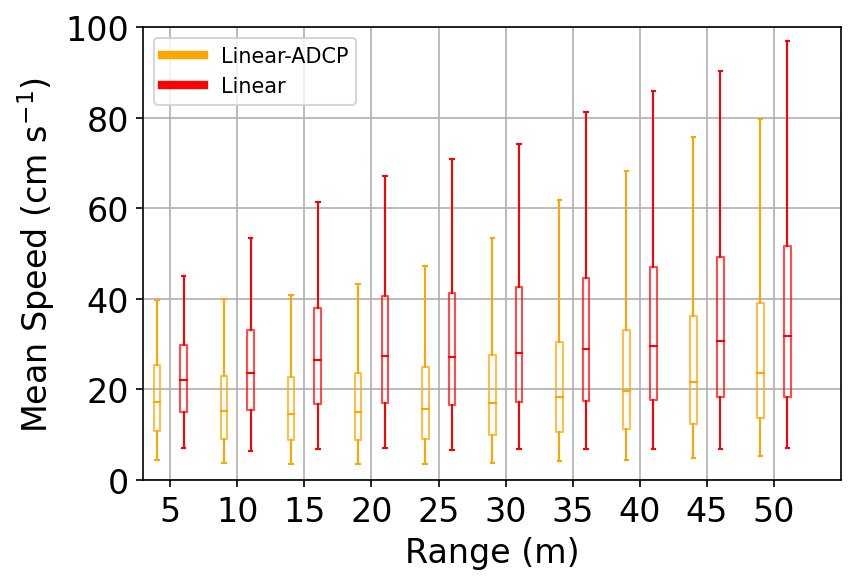

In [171]:
import matplotlib.pyplot as plt
allT = dfMerge#pd.concat([dfD1T,dfD2T,dfD3T])
r = 5

spLin = []
for d in np.arange(0,50,r):
    #spLinLong.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)&(allT.Num_targets >=10)].tSpeedCor)
    spLin.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].tSpeedCor)
    
    
allT = pd.concat([dfD1T,dfD2T,dfD3T])
r = 5

spLinO = []
for d in np.arange(0,50,r):
    spLinO.append(allT[(allT.Target_depth_mean >= d)&(allT.Target_depth_mean < d+r)].linearSpeed*100)
    
fig = plt.figure(dpi=150)
plt.rcParams.update({'font.size': 16})

box=plt.boxplot(spLin,positions =np.arange(5,51,r)+1,whis=[5,95],showfliers=False)
col='orange'
for item in ['whiskers','caps']:
    plt.setp(box[item], color=col)
for item in ['medians','boxes']:
    plt.setp(box[item], color=col)
plt.setp(box["fliers"], markeredgecolor=col)
plt.setp(box["boxes"], color=col,alpha=0.7)

box=plt.boxplot(spLinO,positions =np.arange(5,51,r)-1,whis=[5,95],showfliers=False)
col='red'
for item in ['whiskers','caps']:
    plt.setp(box[item], color=col)
for item in ['medians','boxes']:
    plt.setp(box[item], color=col)
plt.setp(box["fliers"], markeredgecolor=col)
plt.setp(box["boxes"], color=col,alpha=0.7)


plt.axis([0,52,0,100])
plt.gca().invert_xaxis()
plt.xticks(np.arange(5,51,5))
plt.gca().set_xticklabels([str(a) for a in np.arange(50,4,-5)])
plt.xlabel('Range (m)')
plt.ylabel('Mean Speed (cm s$^{-1}$)')
#plt.legend(['B-spline','Linear Model','Linear Model (>=15 Targets)'],fontsize=10)
plt.grid()

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4)]


plt.legend(custom_lines, ['Linear-ADCP', 'Linear'],fontsize=10)

Text(37, 0, 'R$^{2}$ = 0.77')

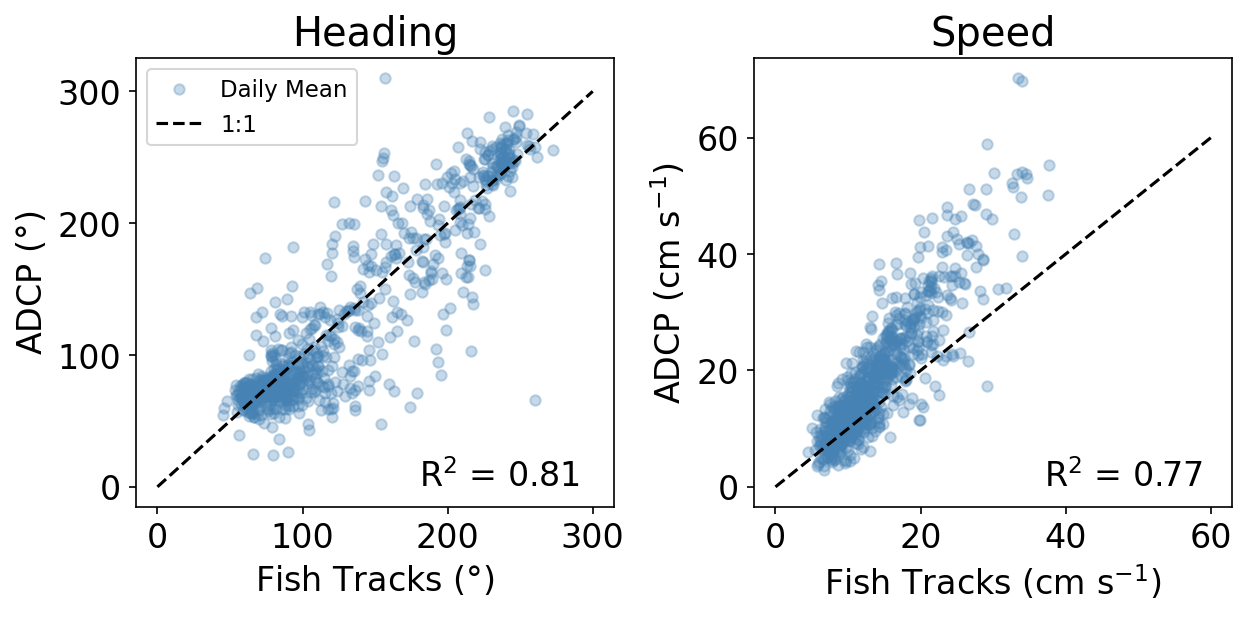

In [174]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True,figsize = (8.2,4),dpi=150)
ax1.plot(dfMerge.resample('1D').mean().linearHead,dfMerge.resample('1D').mean().currentDir,'.',color='steelblue',markersize=10,alpha=.3)
ax1.plot([0,300],[0,300],'--k')
ax1.set_ylabel('ADCP ($\degree$)')
ax1.set_xlabel('Fish Tracks ($\degree$)')
ax1.text(180,0, 'R$^{2}$ = '+str(np.round(np.corrcoef(dfMerge.resample('1D').mean().linearHead,dfMerge.resample('1D').mean().currentDir)[0][1]**2,2)))
ax1.set_title('Heading')
ax1.legend(['Daily Mean','1:1'],fontsize=11)

ax2.plot(dfMerge.resample('1D').mean().linearSpeed*100,dfMerge.resample('1D').mean().currentSpeed,'.',color='steelblue',markersize=10,alpha=.3)
ax2.plot([0,60],[0,60],'--k')
#ax2.plot([10,90],[0,80],'--y')
ax2.set_title('Speed')
ax2.set_xlabel('Fish Tracks (cm s$^{-1}$)')
ax2.set_ylabel('ADCP (cm s$^{-1}$)')
ax2.set_xticks([0,20,40,60])
ax2.text(37,0, 'R$^{2}$ = '+str(np.round(np.corrcoef(dfMerge.resample('1D').mean().linearSpeed*100,dfMerge.resample('1D').mean().currentSpeed)[0][1]**2,2)))

In [176]:
np.mean((dfMerge.resample('1D').mean().linearSpeed*100)/(dfMerge.resample('1D').mean().currentSpeed))

0.842131483632072

In [127]:
from glob import glob
import xarray as xr
uf = glob('../data/physicalData/wind/uwnd*')
vf = glob('../data/physicalData/wind/vwnd*')
dsU = xr.open_mfdataset(uf)
dsV = xr.open_mfdataset(vf)
dsWind = dsU.merge(dsV)
dsWind.sel(lat=70,lon=195)
dfWind =dsWind.sel(lat=70,lon=195).to_dataframe()

<ipython-input-139-09762a8c0c08>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(t,[1,2],np.reshape(wSpeed,(1,len(wSpeed))),cmap=cmocean.cm.balance,vmin=-10, vmax=10)
<ipython-input-139-09762a8c0c08>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(t,[1,2],np.reshape(cSpeed,(1,len(cSpeed))),cmap=cmocean.cm.amp,vmin=0, vmax=25)
<ipython-input-139-09762a8c0c08>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have 

Text(0.5, 0, 'Date')

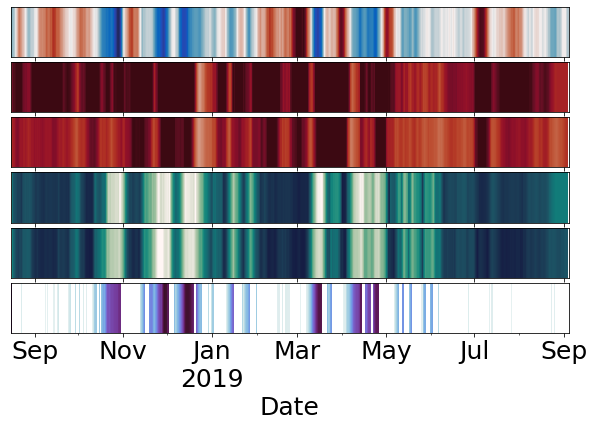

In [139]:
import matplotlib.pyplot as plt
import cmocean

mooring = 3
resample = '7D'
mooringoffset = [50,85,80]
if mooring == 3:
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(10,6))
else:    
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,6))

dfCur = dfWind
dfCur['windSpeed'] = mp.wind_speed(dfCur.uwnd.values*units('m/s'), dfCur.vwnd.values*units('m/s'))
#wSpeed = dfCur.rolling(resample).mean().vwnd.values
wSpeed = dfCur.rolling(resample).mean().vwnd.values
t = dfCur.rolling(resample).mean().index.values

ax1.pcolormesh(t,[1,2],np.reshape(wSpeed,(1,len(wSpeed))),cmap=cmocean.cm.balance,vmin=-10, vmax=10)

dfCur = dfMerge[dfMerge.mooring_x==mooring]
t = dfCur.rolling(resample).mean().index.values
head = abs(dfCur.rolling(resample).mean().rotateHead.values)
cSpeed = dfCur.rolling(resample).mean().currentSpeed.values
tSpeed = dfCur.rolling(resample).mean().linearSpeed.values*100
cDir = dfCur.rolling(resample).mean().currentDir.values-mooringoffset[mooring-1]
cDir[cDir>180] = cDir[cDir>180]-360
cDir = abs(cDir)

d1 = dfCur[dfCur.withPrimary==2].rolling(resample).count()
d2 = dfCur.rolling(resample).count()
withCur = d1.withPrimary/d2.withPrimary
#withCur = withCur.fillna(0)


ax2.pcolormesh(t,[1,2],np.reshape(cSpeed,(1,len(cSpeed))),cmap=cmocean.cm.amp,vmin=0, vmax=25)
ax3.pcolormesh(t,[1,2],np.reshape(tSpeed,(1,len(tSpeed))),cmap=cmocean.cm.amp,vmin=0, vmax=25)
ax4.pcolormesh(t,[1,2],np.reshape(cDir,(1,len(cDir))),cmap=cmocean.cm.tempo_r,vmin=0, vmax=180)
ax5.pcolormesh(t,[1,2],np.reshape(head,(1,len(head))),cmap=cmocean.cm.tempo_r,vmin=0, vmax=180)
ax6.pcolormesh(withCur.index,[1,2],np.reshape(withCur.values,(1,len(withCur.rolling(resample).mean().values))),cmap=cmocean.cm.dense,vmin=0, vmax=1)
#ax1.text(pd.to_datetime('2017-08-15'),2.1,'Northward Wind Speed')
#ax2.text(pd.to_datetime('2017-08-15'),2.1,'ADCP Speed')
#ax3.text(pd.to_datetime('2017-08-15'),2.1,'Track Speed')
#ax4.text(pd.to_datetime('2017-08-15'),2.1,'ADCP Direction')
#ax5.text(pd.to_datetime('2017-08-15'),2.1,'Track Direction')
#ax6.text(pd.to_datetime('2017-08-15'),2.1,'% tracks S/E')
[a.set_xticklabels(['']) for a in [ax1,ax2,ax3,ax4,ax5]]
[a.set_yticklabels(['']) for a in [ax1,ax2,ax3,ax4,ax5,ax6]]
[a.set_yticks([]) for a in [ax1,ax2,ax3,ax4,ax5,ax6]]
if mooring == 3:
    [a.set_xlim([t[0],pd.to_datetime('2019-9-4')]) for a in [ax1,ax2,ax3,ax4,ax5,ax6]]
else:
    [a.set_xlim([pd.to_datetime('2017-8-4'),pd.to_datetime('2019-9-4')]) for a in [ax1,ax2,ax3,ax4,ax5,ax6]]
plt.subplots_adjust(hspace=0.1)

plt.rcParams.update({'font.size':25})
maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,2))
ax6.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax6.xaxis.set_minor_locator(min_loc)
zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
ax6.xaxis.set_major_formatter(maj_fmt)
ax6.set_xlabel('Date')

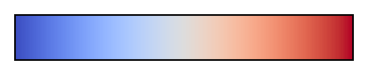

In [176]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean

fig = plt.figure(figsize=(2.5, 2),dpi=150)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
#cmap = cmocean.cm.tempo
#cmap = cmocean.cm.amp
#cmap = cmocean.cm.dense
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=3)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_ticks([])

Text(-35, 40, 'R$^{2}$ = 0.72')

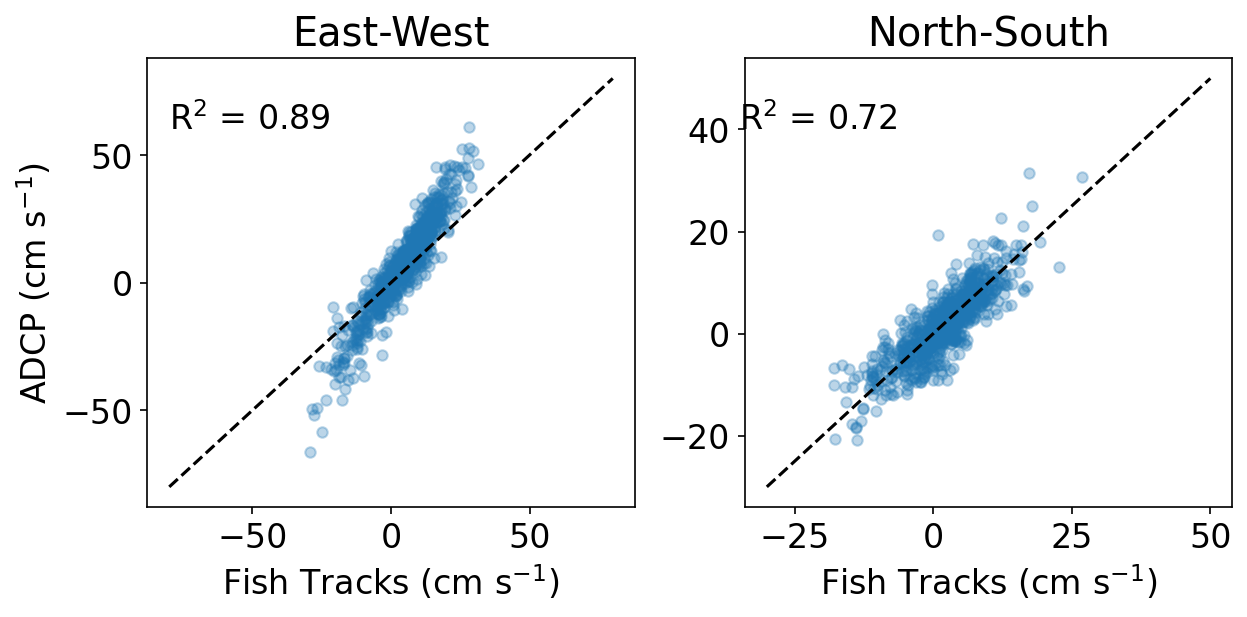

In [177]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True,figsize = (8.2,4),dpi=150)
ax1.plot(dfMerge.resample('1D').mean().u_track,dfMerge.resample('1D').mean().u,'.',markersize=10,alpha=.3)
ax1.plot([-80,80],[-80,80],'--k')
ax1.set_title('East-West')
ax1.set_ylabel('ADCP (cm s$^{-1}$)')
ax1.set_xlabel('Fish Tracks (cm s$^{-1}$)')
ax1.text(-80,60, 'R$^{2}$ = '+str(np.round(np.corrcoef(dfMerge.resample('1D').mean().u_track,dfMerge.resample('1D').mean().u)[0][1]**2,2)))

ax2.plot(dfMerge.resample('1D').mean().v_track,dfMerge.resample('1D').mean().v,'.',markersize=10,alpha=.3)
ax2.plot([-30,50],[-30,50],'--k')
ax2.set_title('North-South')
ax2.set_xlabel('Fish Tracks (cm s$^{-1}$)')
ax2.text(-35,40, 'R$^{2}$ = '+str(np.round(np.corrcoef(dfMerge.resample('1D').mean().v_track,dfMerge.resample('1D').mean().v)[0][1]**2,2)))

In [185]:
dfMerge[dfMerge.mooring_x==2]

,TS_mean,linearSpeed,linearHead,Target_depth_mean,rotateHead,mooring_x,u,v,mooring_y,currentDir,currentSpeed,angOffset,withCur,tsZone,speed,u_track,v_track,withPrimary
Datetime,,,,,,,,,,,,,,,,,,
2017-08-09 04:00:29.020,-59.083325,0.076,60.216,38.256716,-19.784,2,18.796316,-4.201044,2,102.598755,19.260069,42.382755,1,0,0,6.596072,3.775160,1
2017-08-09 04:00:50.000,-52.169122,0.100,359.339,36.480492,279.339,2,18.796316,-4.201044,2,102.598755,19.260069,256.740245,0,2,1,-0.115364,9.999335,0
2017-08-09 04:01:02.010,-63.830749,0.047,70.038,42.572093,-9.962,2,18.796316,-4.201044,2,102.598755,19.260069,32.560755,1,0,0,4.417620,1.604565,1
2017-08-09 04:01:07.000,-54.347949,0.033,114.119,40.437475,34.119,2,18.796316,-4.201044,2,102.598755,19.260069,11.520245,1,2,0,3.011906,-1.348489,1
2017-08-09 04:01:56.000,-57.833685,0.072,71.505,41.355936,-8.495,2,18.796316,-4.201044,2,102.598755,19.260069,31.093755,1,1,0,6.828130,2.283998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-04 00:01:25.029,-65.756232,0.078,117.025,20.527130,37.025,2,7.324199,-3.891931,2,117.985275,8.294035,0.960275,1,0,0,6.948305,-3.544158,1
2019-09-04 00:01:55.073,-47.326724,0.104,79.445,6.827682,-0.555,2,7.324199,-3.891931,2,117.985275,8.294035,38.540275,1,3,1,10.224027,1.905065,1
2019-09-04 00:01:55.073,-60.809327,0.156,65.286,39.176437,-14.714,2,7.324199,-3.891931,2,117.985275,8.294035,52.699275,0,0,2,14.171134,6.522189,1


array([-58.8248375, -54.85032  , -51.3032015])

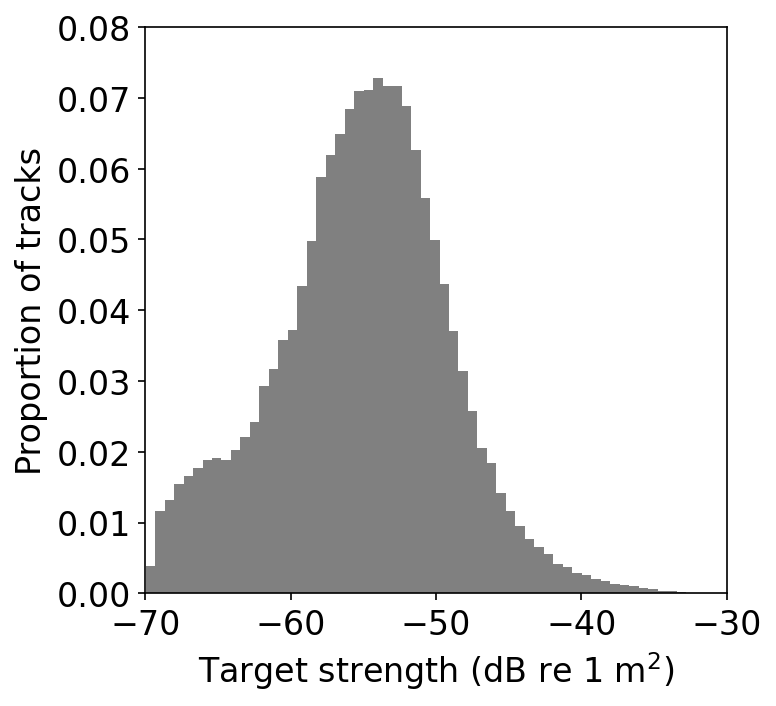

In [178]:
fig = plt.figure(figsize=(5,5),dpi=150)
plt.hist(dfMerge.TS_mean,bins=60,density=True,color='grey');
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2],0,.08,'k')
plt.axis([-70,-30,0,.08])
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0]+.1,0.075, '25%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1]+.1,0.075, '50%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2]+.1,0.075, '75%',fontsize=12)
plt.xlabel('Target strength (dB re 1 m$^{2}$)')
plt.ylabel('Proportion of tracks')
dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values

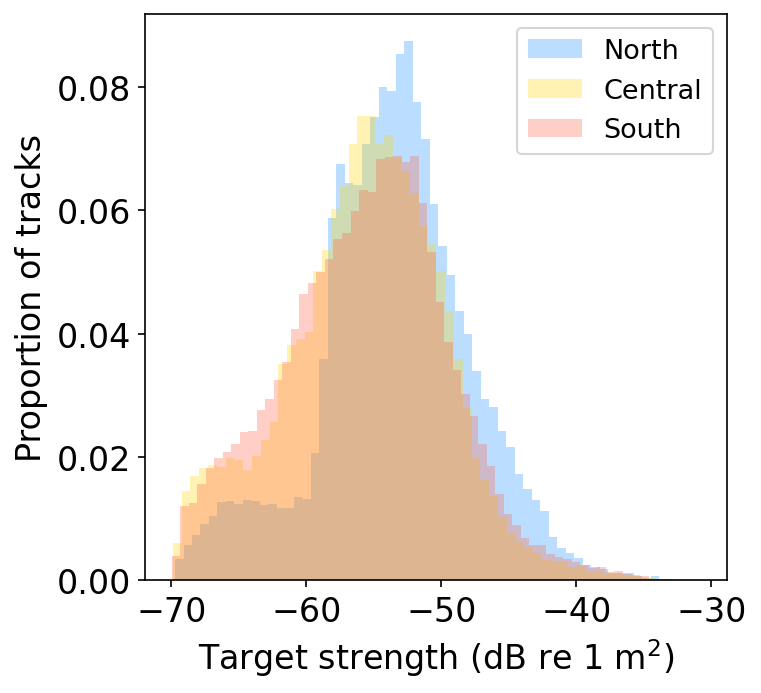

In [171]:
fig = plt.figure(figsize=(5,5),dpi=150)

plt.hist(dfMerge[dfMerge.mooring_x==3].TS_mean,bins=60,density=True,color='dodgerblue',alpha=0.3);
plt.hist(dfMerge[dfMerge.mooring_x==2].TS_mean,bins=60,density=True,color='gold',alpha=0.3);
plt.hist(dfMerge[dfMerge.mooring_x==1].TS_mean,bins=60,density=True,color='tomato',alpha=0.3);
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2],0,.08,'k')
#plt.axis([-70,-30,0,.08])
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0]+.1,0.075, '25%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1]+.1,0.075, '50%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2]+.1,0.075, '75%',fontsize=12)
plt.xlabel('Target strength (dB re 1 m$^{2}$)')
plt.ylabel('Proportion of tracks')
plt.legend(['North','Central','South'],fontsize=13)

26.312462545183784
10.757095116550365


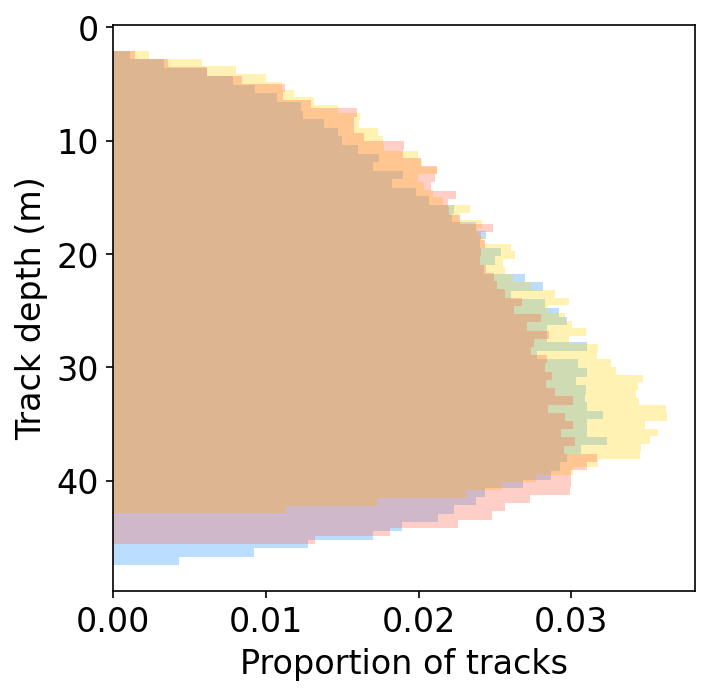

In [66]:
fig = plt.figure(figsize=(5,5),dpi=150)

plt.hist(dfMerge[dfMerge.mooring_x==3].Target_depth_mean,bins=60,density=True,color='dodgerblue',alpha=0.3,orientation='horizontal');
plt.hist(dfMerge[dfMerge.mooring_x==2].Target_depth_mean,bins=60,density=True,color='gold',alpha=0.3,orientation='horizontal');
plt.hist(dfMerge[dfMerge.mooring_x==1].Target_depth_mean,bins=60,density=True,color='tomato',alpha=0.3,orientation='horizontal');
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1],0,.08,'k')
#plt.vlines(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2],0,.08,'k')
#plt.axis([-70,-30,0,.08])
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[0]+.1,0.075, '25%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[1]+.1,0.075, '50%',fontsize=12)
#plt.text(dfMerge.TS_mean.quantile([0.25,0.5,0.75]).values[2]+.1,0.075, '75%',fontsize=12)
plt.xlabel('Proportion of tracks')
plt.ylabel('Track depth (m)')
plt.gca().invert_yaxis()
#plt.legend(['North','Central','South'],fontsize=13)
print(dfMerge.Target_depth_mean.mean())
print(dfMerge.Target_depth_mean.std())

Text(0.5, 0, 'Date')

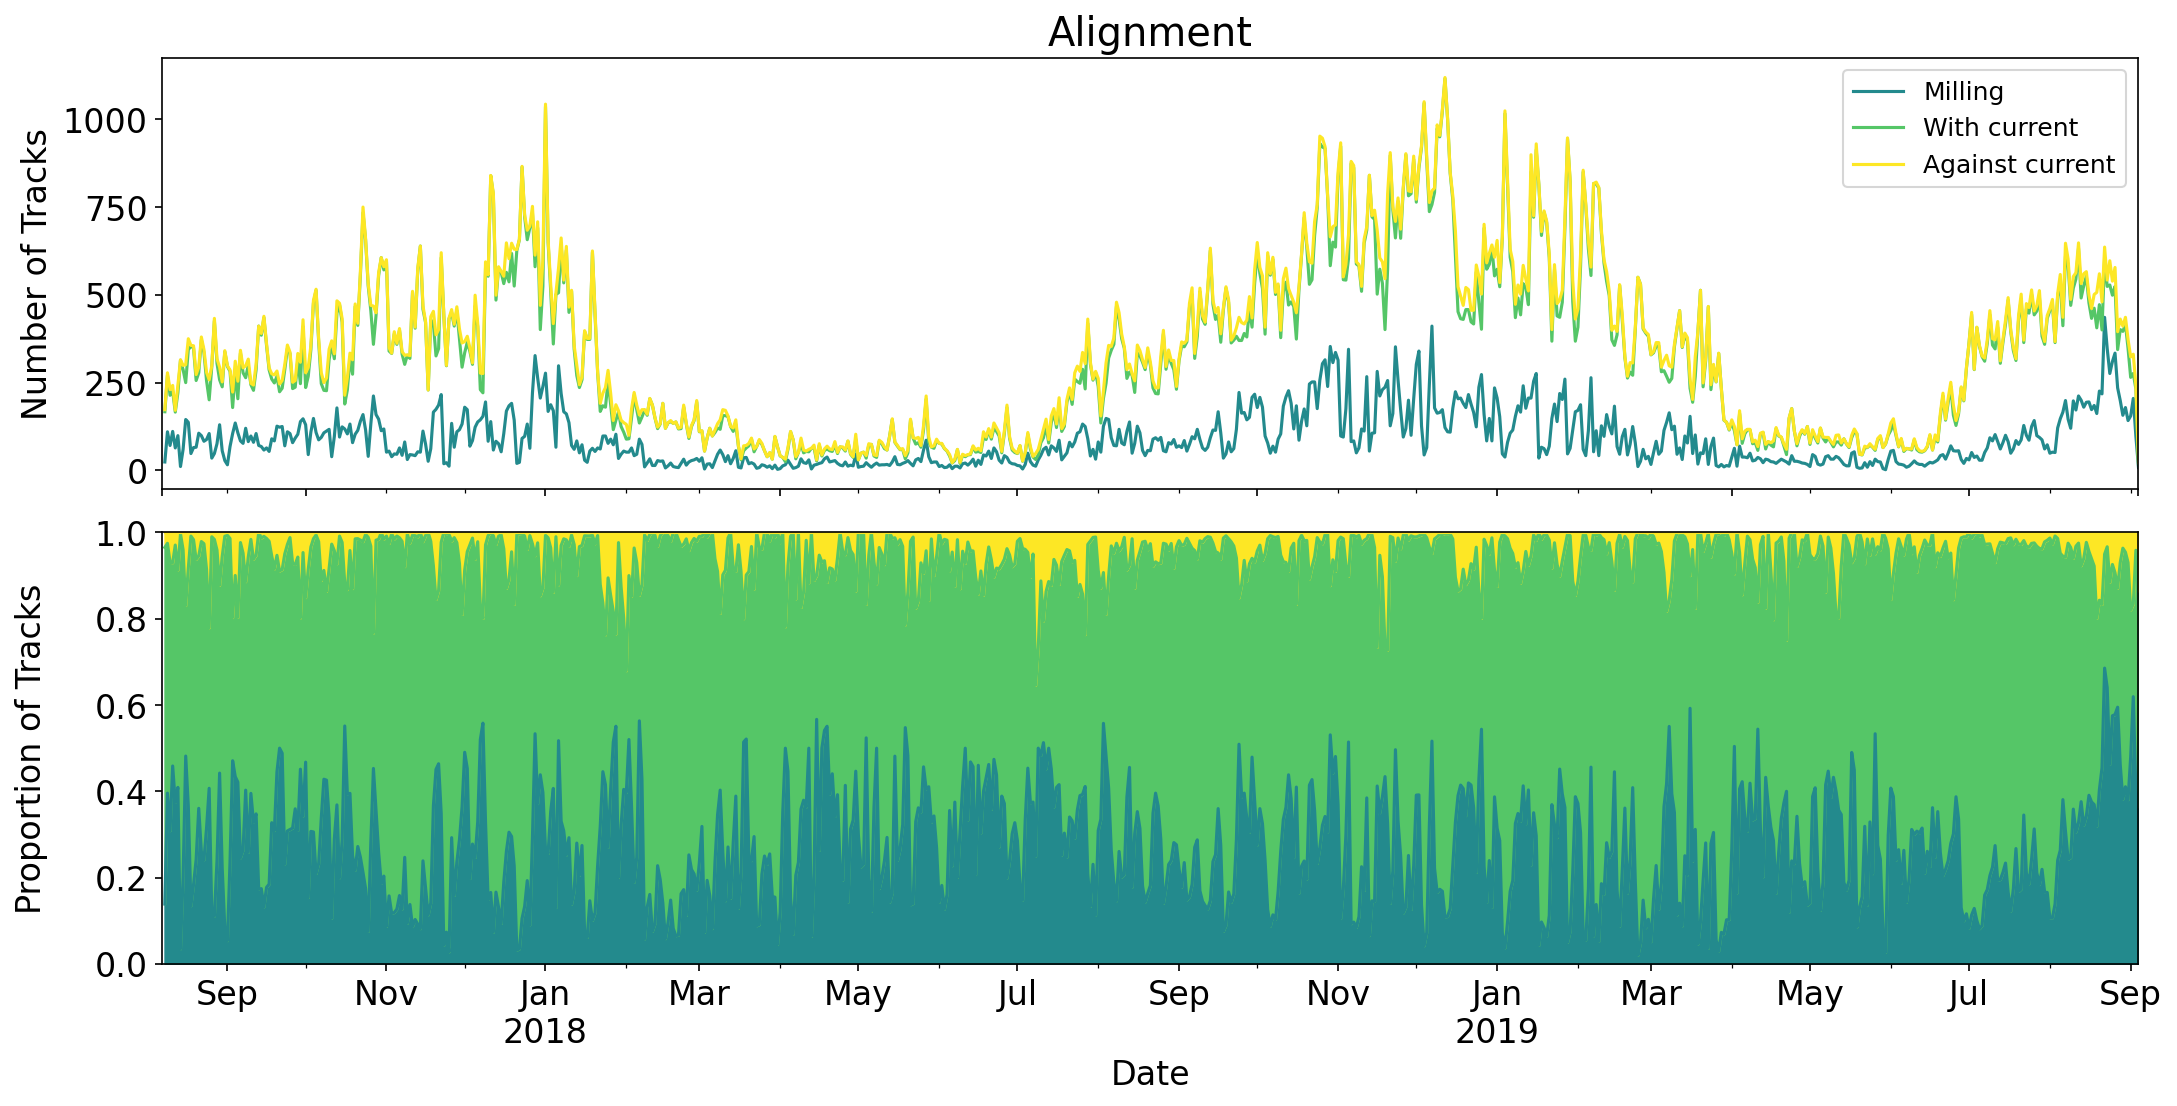

In [92]:
colors = ['#404788FF','#238A8DFF','#55C667FF','#FDE725FF']
resample = '1D'
# WithCur: 0 = milling, 1 = with current, 2 = against current
fig = plt.figure(figsize=(17,8),dpi = 150)
ax1 = plt.subplot(211)
dfMerge[dfMerge.withCur== 0].resample(resample).count().speed.plot(color=colors[1]) # Milling
dfMerge[(dfMerge.withCur== 0)|(dfMerge.withCur== 1)].resample(resample).count().withCur.plot(color=colors[2]) # milling and with current
dfMerge.resample(resample).count().withCur.plot(color=colors[3])

ax1.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
plt.legend(['Milling','With current','Against current'],fontsize=12)
plt.title('Alignment')
plt.ylabel('Number of Tracks')


ax2 = plt.subplot(212)
hold = 0
ct = 1
for k in [0,1,2]:
    dfCur = dfMerge[dfMerge.withCur==k].resample(resample).count()
    dfCurTot = dfMerge.resample(resample).count()
    d = (dfCur.withCur/dfCurTot.withCur)
    ax2.plot(d+hold,color = colors[ct])
    ax2.fill_between(dfCur.index,d+hold,0+hold,color = colors[ct])
    hold = d+hold
    ct+=1
plt.ylabel('Proportion of Tracks\n')
ax2.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
ax2.set_ylim([0,1])

ax1.set_xticklabels([])
ax1.set_xlabel('')
fmtAxis(ax2)
plt.subplots_adjust(hspace=0.1)
plt.xlabel('Date')

Text(0.5, 0, 'Date')

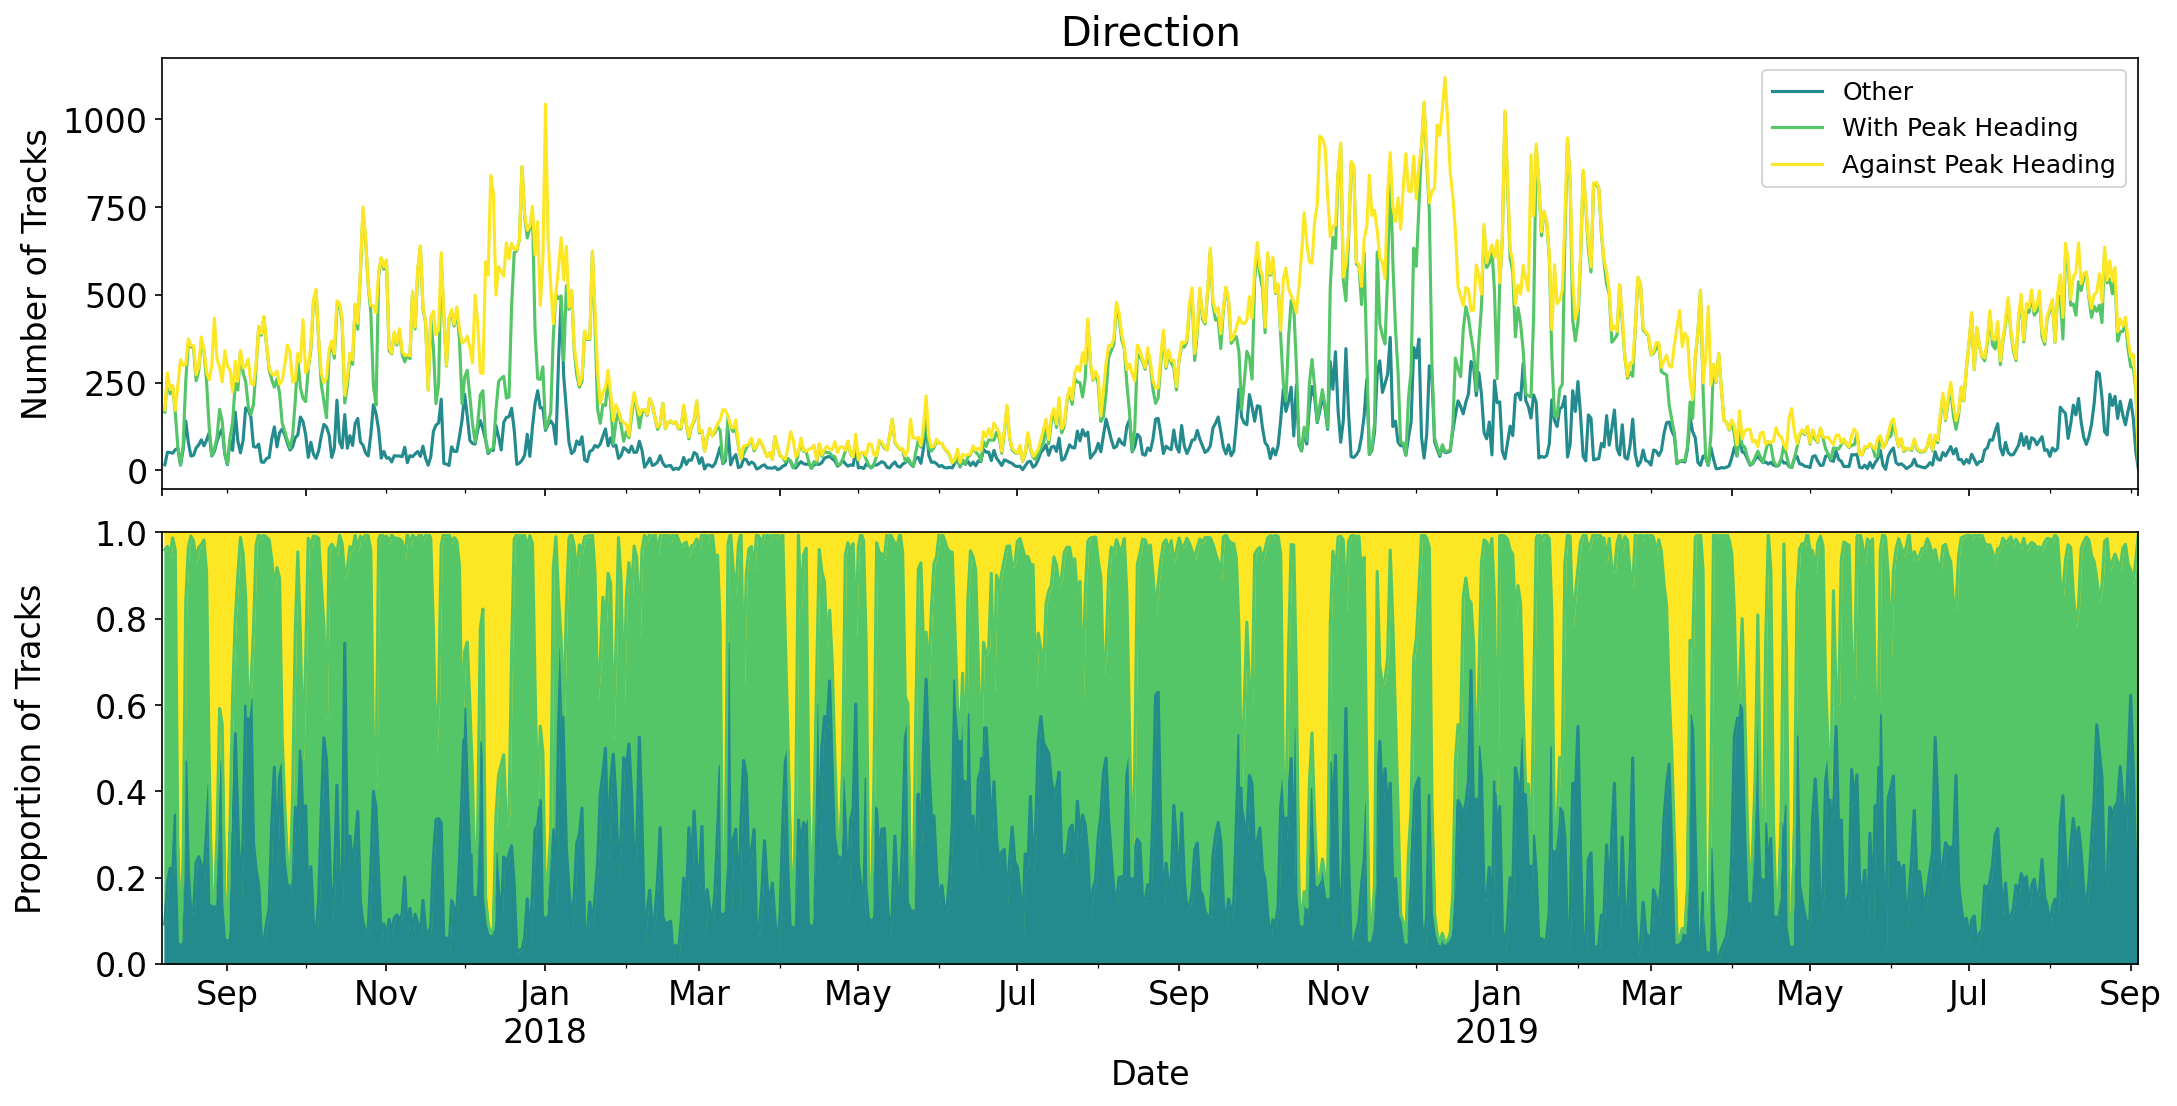

In [99]:
colors = ['#404788FF','#238A8DFF','#55C667FF','#FDE725FF']
resample = '1D'

dfMergeCur = dfMerge#[(dfMerge.tsZone==3)]#|(dfMerge.tsZone==1)]

# WithCur: 0 = milling, 1 = with current, 2 = against current
fig = plt.figure(figsize=(17,8),dpi = 150)
ax1 = plt.subplot(211)
dfMergeCur[dfMergeCur.withPrimary== 0].resample(resample).count().speed.plot(color=colors[1]) # Milling
dfMergeCur[(dfMergeCur.withPrimary== 0)|(dfMergeCur.withPrimary== 1)].resample(resample).count().withPrimary.plot(color=colors[2]) # milling and with current
dfMergeCur.resample(resample).count().withPrimary.plot(color=colors[3])

ax1.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
plt.legend(['Other','With Peak Heading','Against Peak Heading'],fontsize=12)
plt.title('Direction')
plt.ylabel('Number of Tracks')

ax2 = plt.subplot(212)
hold = 0

ct = 1
for k in [0,1,2]:
    dfCur = dfMergeCur[dfMergeCur.withPrimary==k].resample(resample).count()
    dfCurTot = dfMergeCur.resample(resample).count()
    d = (dfCur.withPrimary/dfCurTot.withPrimary)
    ax2.plot(d+hold,color = colors[ct])
    a = d+hold
    b = 0+hold
    try:
        ax2.fill_between(dfCur.index,a[:len(dfCur.index)],b[:len(dfCur.index)],color = colors[ct])
    except:
        ax2.fill_between(dfCur.index,a[:len(dfCur.index)],b,color = colors[ct])
    hold = d+hold
    ct+=1
plt.ylabel('Proportion of Tracks\n')
ax2.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
ax2.set_ylim([0,1])


ax1.set_xticklabels([])
ax1.set_xlabel('')
fmtAxis(ax2)
plt.subplots_adjust(hspace=0.1)
plt.xlabel('Date')

Text(0.5, 0, 'Date')

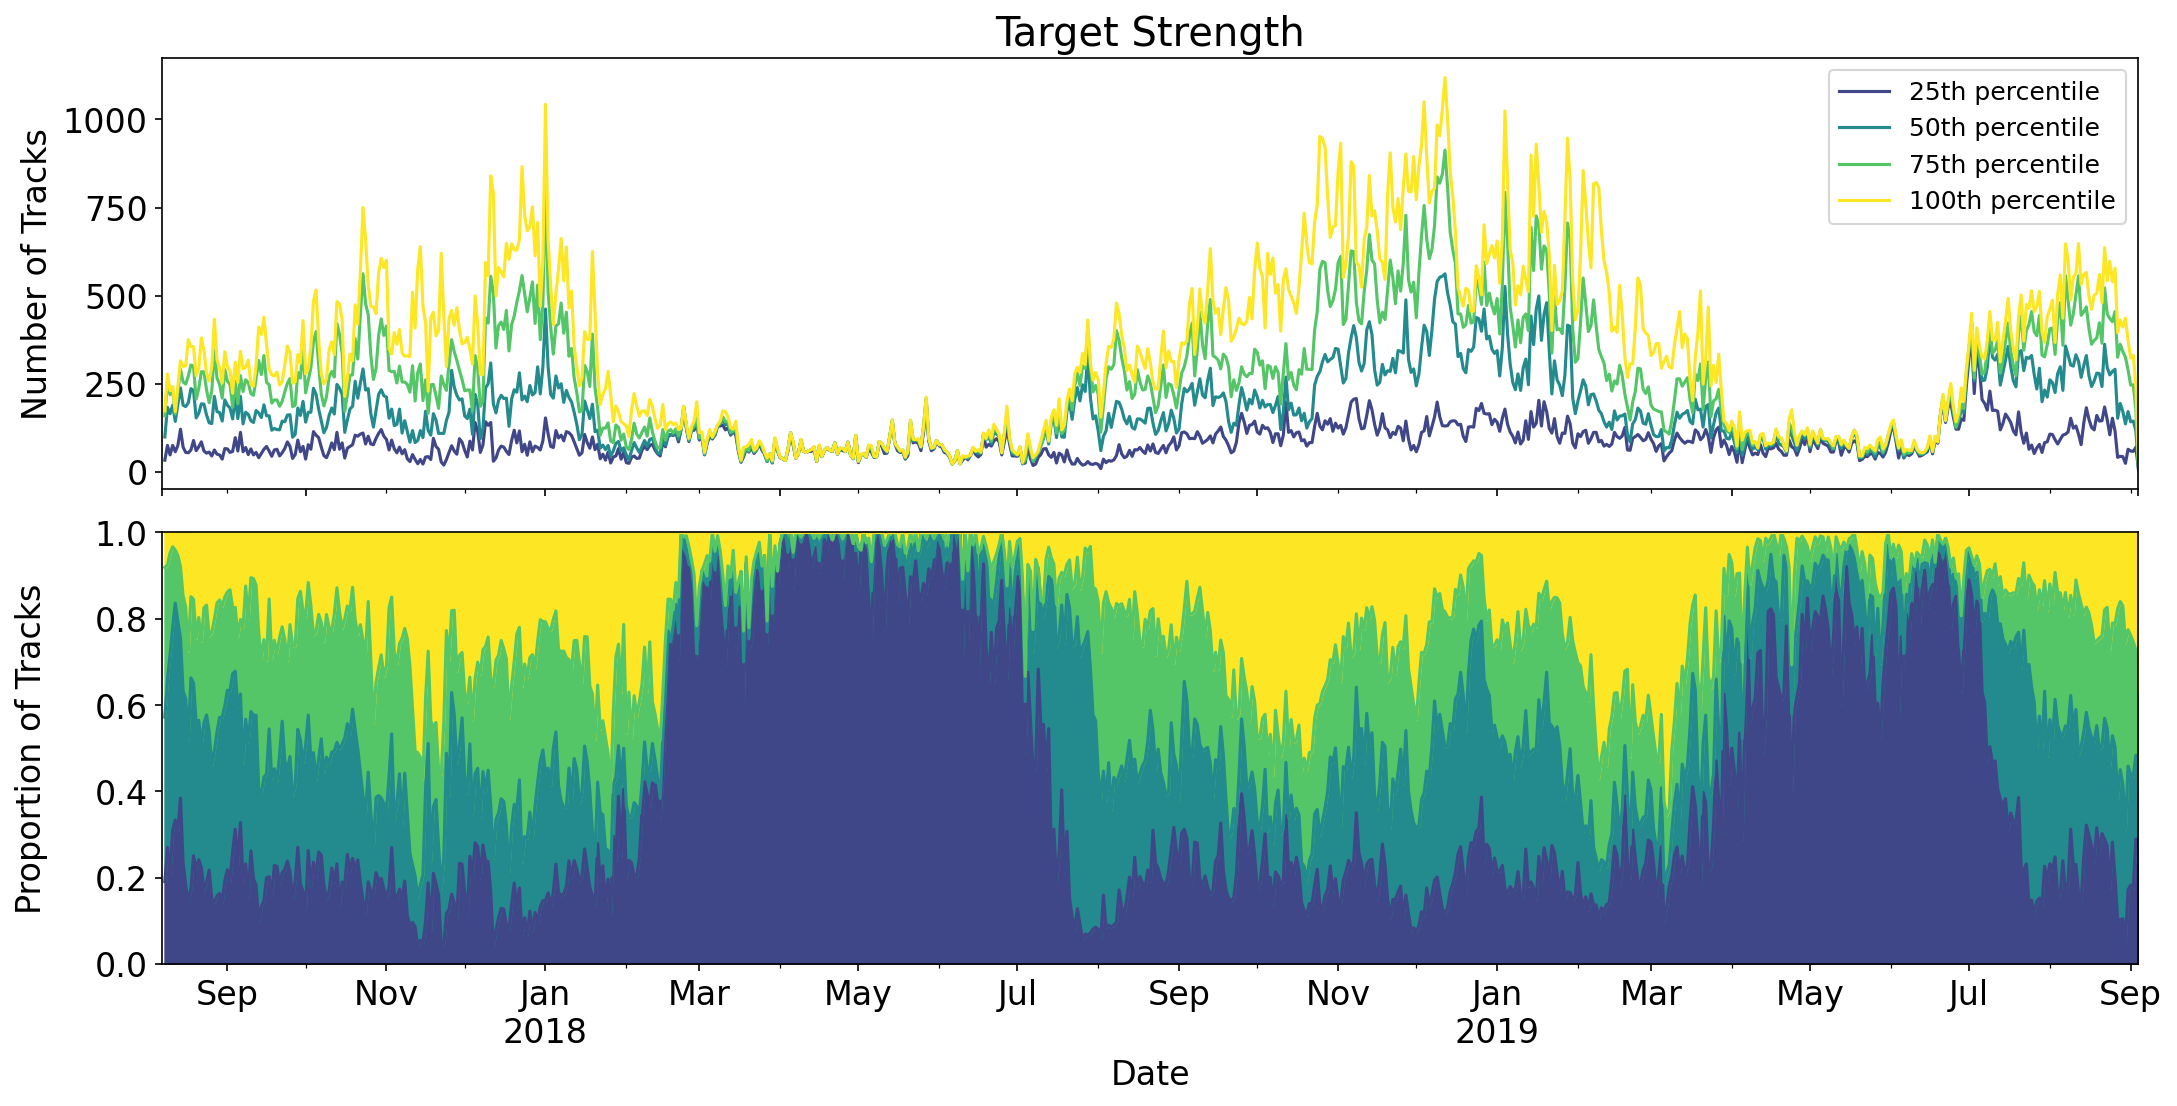

In [95]:
resample = '1D'
colors = ['#404788FF','#238A8DFF','#55C667FF','#FDE725FF']
# tsZone: 0 = 0-25%, 1 = 25-50%, 2 = 50-75%, 3 = 75-100%

fig = plt.figure(figsize=(17,8),dpi = 150)
ax1 = plt.subplot(211)
dfMerge[dfMerge.tsZone== 0].resample(resample).count().speed.plot(color=colors[0]) # Milling
dfMerge[(dfMerge.tsZone== 0)|(dfMerge.tsZone== 1)].resample(resample).count().tsZone.plot(color=colors[1]) # milling and with current
dfMerge[(dfMerge.tsZone== 0)|(dfMerge.tsZone== 1)|(dfMerge.tsZone== 2)].resample(resample).count().tsZone.plot(color=colors[2]) # milling and with current
dfMerge.resample(resample).count().speed.plot(color=colors[3])
ax1.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
plt.legend(['25th percentile','50th percentile','75th percentile','100th percentile'],fontsize=12)
plt.title('Target Strength')
plt.ylabel('Number of Tracks')

ax2 = plt.subplot(212)
hold = 0
ct = 0
for k in [0,1,2,3]:
    dfCur = dfMerge[dfMerge.tsZone==k].resample(resample).count()
    dfCurTot = dfMerge.resample(resample).count()
    d = (dfCur.tsZone/dfCurTot.tsZone)
    ax2.plot(d+hold,color=colors[ct])
    ax2.fill_between(dfCur.index,d+hold,0+hold,color=colors[ct])
    hold = d+hold
    ct+=1
plt.ylabel('Proportion of Tracks\n')
ax2.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
ax2.set_ylim([0,1])

ax1.set_xticklabels([])
ax1.set_xlabel('')
fmtAxis(ax2)
plt.subplots_adjust(hspace=0.1)
plt.xlabel('Date')

Text(0.5, 0, 'Date')

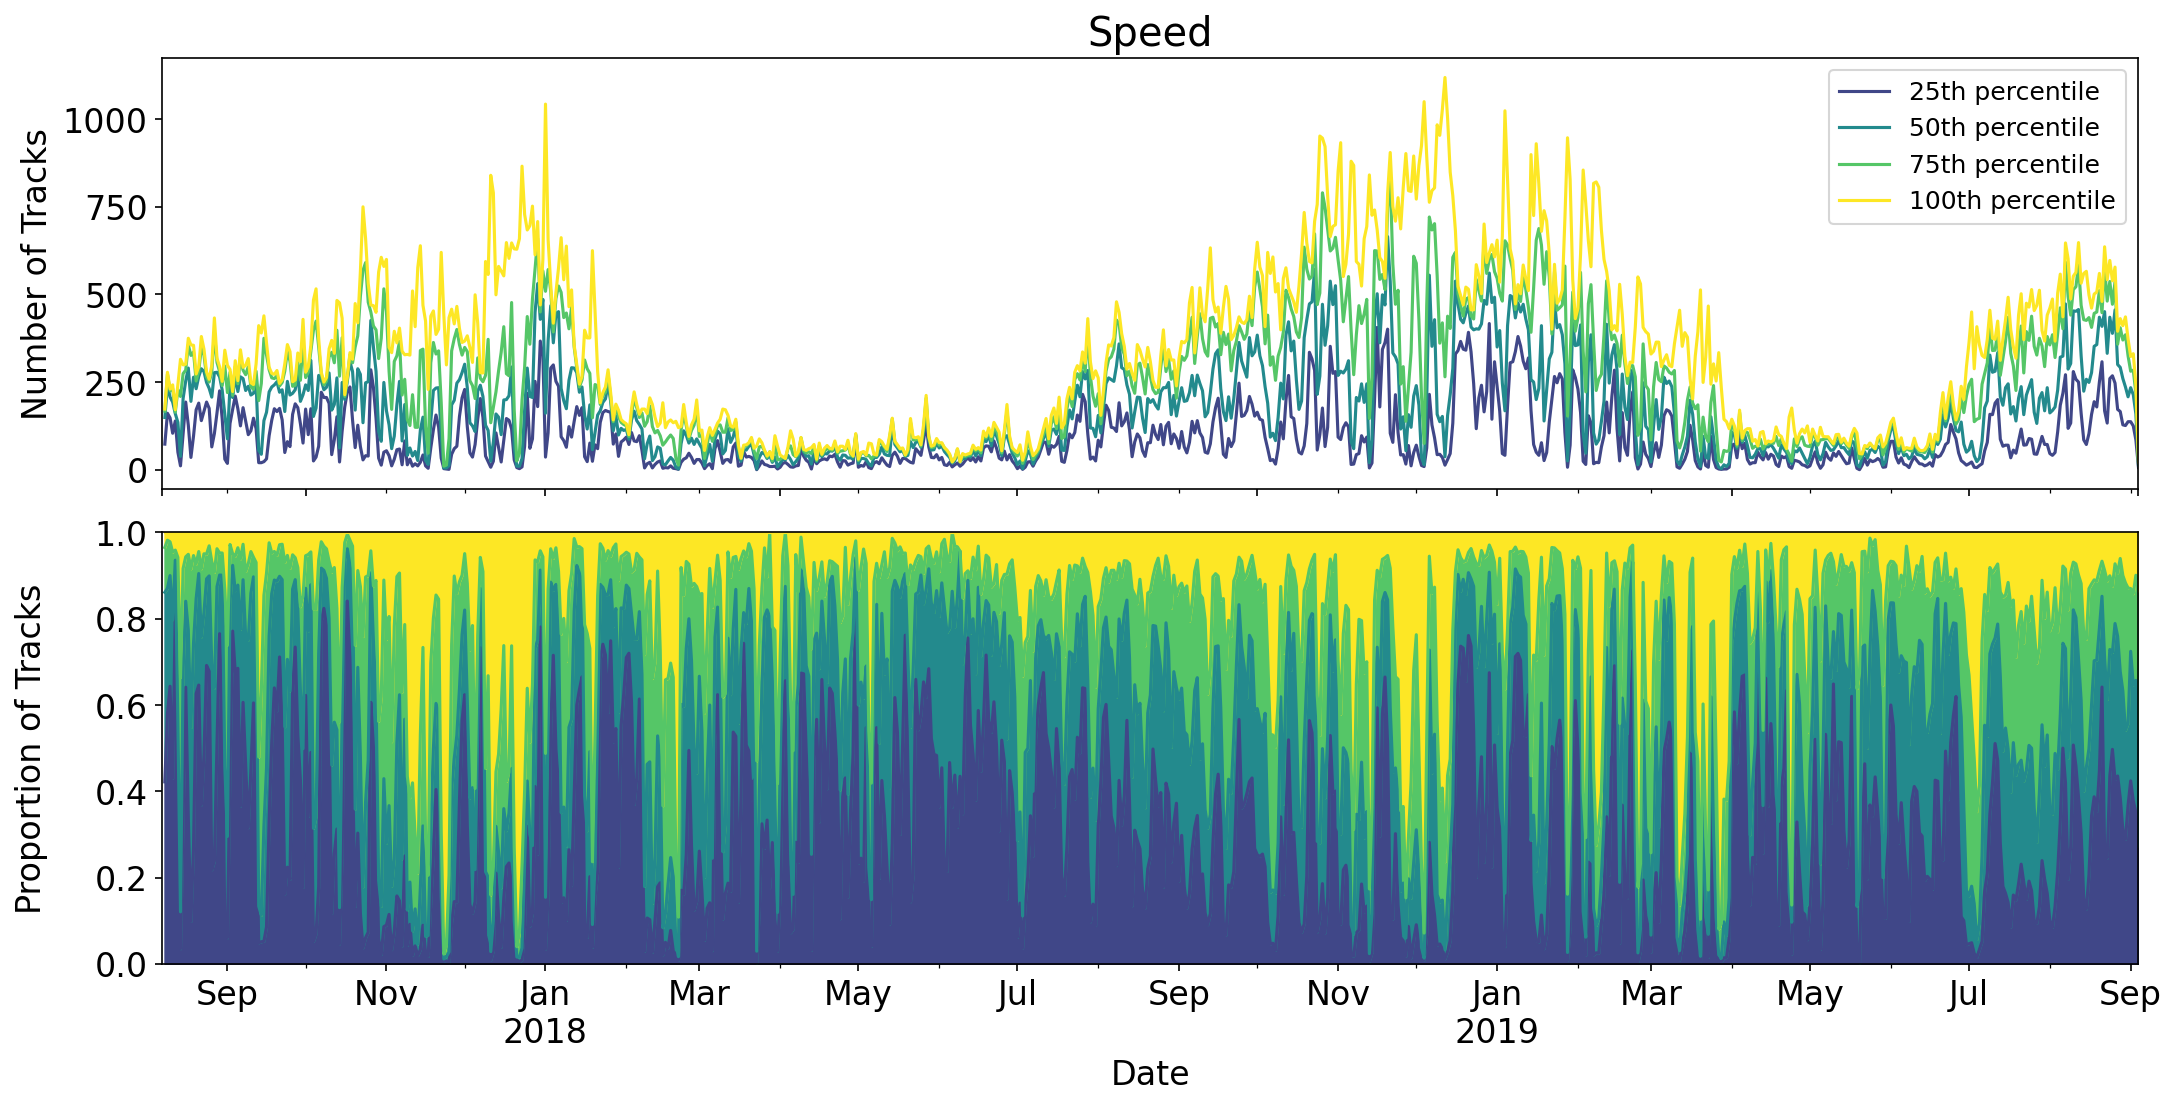

In [96]:
resample = '1D'

# tsZone: 0 = 0-25%, 1 = 25-50%, 2 = 50-75%, 3 = 75-100%

fig = plt.figure(figsize=(17,8),dpi = 150)
ax1 = plt.subplot(211)
dfMerge[dfMerge.speed== 0].resample(resample).count().speed.plot(color=colors[0]) # Milling
dfMerge[(dfMerge.speed== 0)|(dfMerge.speed== 1)].resample(resample).count().tsZone.plot(color=colors[1]) # milling and with current
dfMerge[(dfMerge.speed== 0)|(dfMerge.speed== 1)|(dfMerge.speed== 2)].resample(resample).count().tsZone.plot(color=colors[2]) # milling and with current
dfMerge.resample(resample).count().speed.plot(color=colors[3])
plt.legend(['25th percentile','50th percentile','75th percentile','100th percentile'],fontsize=12)
plt.title('Speed')
plt.ylabel('Number of Tracks')
ax1.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])


ax2 = plt.subplot(212)
hold = 0
ct =0
for k in [0,1,2,3]:
    dfCur = dfMerge[dfMerge.speed==k].resample(resample).count()
    dfCurTot = dfMerge.resample(resample).count()
    d = (dfCur.speed/dfCurTot.speed)
    ax2.plot(d+hold,color=colors[ct])
    ax2.fill_between(dfCur.index,d+hold,0+hold,color=colors[ct])
    hold = d+hold
    ct+=1
plt.ylabel('Proportion of Tracks\n')
ax2.set_xlim([pd.to_datetime('2017-8-7'),pd.to_datetime('2019-9-4')])
ax2.set_ylim([0,1])

ax1.set_xticklabels([])
ax1.set_xlabel('')
fmtAxis(ax2)
plt.subplots_adjust(hspace=0.1)
plt.xlabel('Date')

27.511073

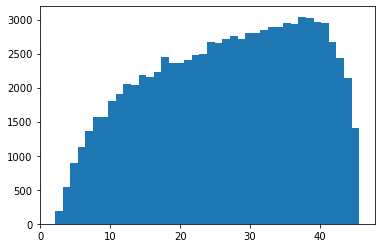

In [41]:
plt.hist(a.Target_depth_mean,bins=40)
a.Target_depth_mean.median()

26.7163365

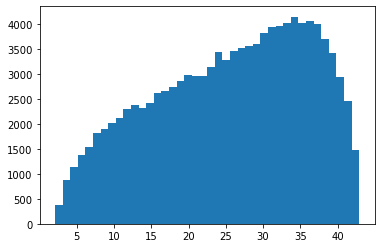

In [42]:
plt.hist(b.Target_depth_mean,bins=40)
b.Target_depth_mean.median()

28.016197

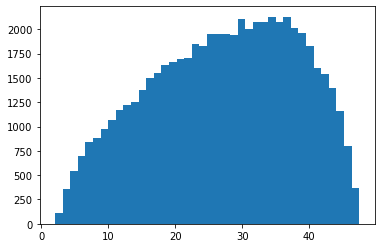

In [43]:
plt.hist(c.Target_depth_mean,bins=40)
c.Target_depth_mean.median()

array([[1.       , 0.9437543],
       [0.9437543, 1.       ]])

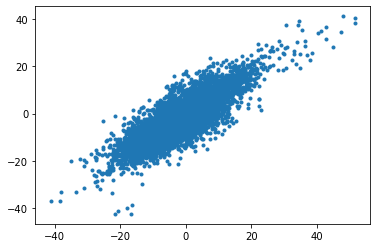

In [38]:
import matplotlib.pyplot as plt
plt.plot(np.ravel(bigDs[0].sel(depth=20).v_1206.values),np.ravel(bigDs[0].sel(depth=28).v_1206.values),'.')
np.corrcoef(np.ravel(bigDs[0].sel(depth=32).v_1206.values),np.ravel(bigDs[0].sel(depth=28).v_1206.values))